# Model Training

## Import data and required Libraries

In [18]:
# Basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

#Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
dataset = pd.read_csv(r'data/Material_Lifespan_Dataset.csv')

In [5]:
dataset.head(2)

,PredictedHours,ComponentType,StructureType,CoolRate,QuenchDuration,ForgeDuration,HeatProcessTime,NickelComposition,IronComposition,CobaltComposition,ChromiumComposition,MinorDefects,MajorDefects,EdgeDefects,InitialPosition,FormationMethod
0,1461.797,Nozzle,equiGrain,12.836,3.803,6.515,47.005,65.450,16.618,16.510,0.938,10,0,0,Bottom,Die
1,1825.977,Block,singleGrain,19.032,2.593,3.521,45.246,54.162,34.916,6.063,4.292,19,0,0,Bottom,Investment


### Preparing X and y variables

In [6]:
X = dataset.drop(columns=['PredictedHours'], axis='columns')
y = dataset['PredictedHours']

### Create Column Transformer with 3 types of transformers

In [7]:
num_cols = [col for col in X.columns if dataset[col].dtype != 'O']
cat_cols = [col for col in X.columns if dataset[col].dtype == 'O']

In [8]:
standard_scalar = StandardScaler()
onehot_encoding = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoding", onehot_encoding, cat_cols),
        ('StandardScalar', standard_scalar, num_cols)
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 23)

### separate dataset into train and test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 23), (200, 23))

## Create an Evaluate Function to give all metrics after model Training

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [14]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    # model fit
    model.fit(X_train, y_train)

    # model prediction
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    # evaluate train and test dataset.
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_predict)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_predict)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2))
    r2_list.append(test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 306.6607
- Mean Absolute Error: 260.8283
- R2 Score: 0.2109
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 302.3406
- Mean Absolute Error: 255.1003
- R2 Score: 0.1170


Lasso
Model performance for Training set
- Root Mean Squared Error: 306.8935
- Mean Absolute Error: 261.0211
- R2 Score: 0.2097
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 302.1520
- Mean Absolute Error: 255.2027
- R2 Score: 0.1181


Ridge
Model performance for Training set
- Root Mean Squared Error: 306.5183
- Mean Absolute Error: 260.6190
- R2 Score: 0.2116
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 302.1539
- Mean Absolute Error: 255.4357
- R2 Score: 0.1181


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 211.2643
- Mean Absolute Error: 170.4095
- R2 Score: 0.

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Values']).sort_values(by=['R2 Values'], ascending=False)

,Model Name,R2 Values
6,XGBRegressor,0.944729
5,Random Forest Regressor,0.928555
4,Decision Tree,0.865068
7,AdaBoost Regressor,0.830678
3,K-Neighbors Regressor,0.406764
1,Lasso,0.118122
2,Ridge,0.118111
0,Linear Regression,0.117020


From the above table, XGBoost and Random Forest Regressor gives the test results when compare to others.

# XGBoost Regressor

In [16]:
xgboost_model = XGBRegressor()
xgboost_model = xgboost_model.fit(X_train, y_train)
y_pred = xgboost_model.predict(X_test)
score = r2_score(y_test, y_pred)
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 0.94


### Plot y_pred and y_test


Text(0, 0.5, 'Predicted')

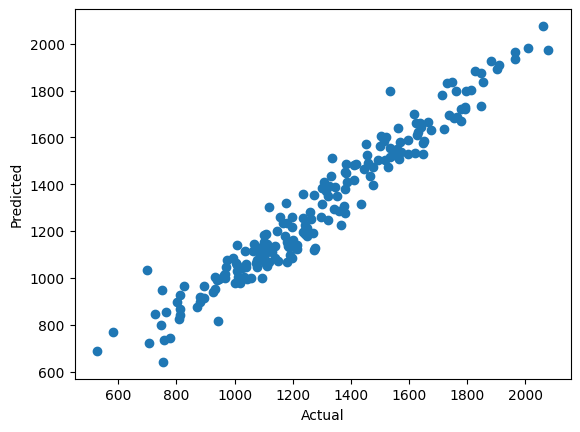

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='PredictedHours'>

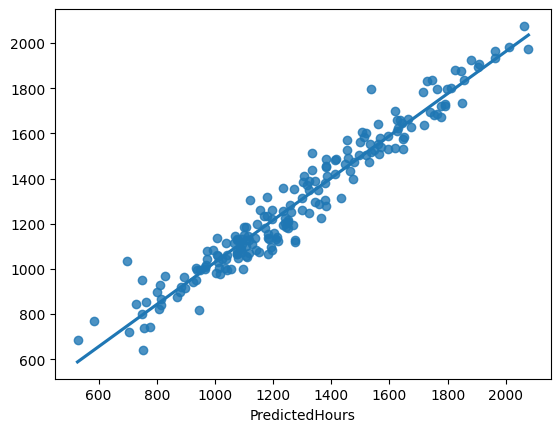

In [22]:
sns.regplot(x=y_test, y=y_pred, ci=None)

### Difference Between Actual vs Predicted

In [25]:
diff_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
diff_df.sort_values(by=['Difference'], ascending=False).head()

,Actual Value,Predicted Value,Difference
67,1274.107,1119.756836,154.350164
650,1275.225,1127.912720,147.312280
947,1364.834,1226.485962,138.348038
753,944.581,816.013367,128.567633
70,1434.726,1314.096436,120.629564


In [26]:
diff_df.sort_values(by=['Difference'], ascending=True).head()

,Actual Value,Predicted Value,Difference
72,699.054,1035.136108,-336.082108
88,1535.276,1797.401978,-262.125978
714,749.810,950.706543,-200.896543
741,582.267,769.332336,-187.065336
998,1118.894,1304.485474,-185.591474
